In [2]:
# load your software stack
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

               data
count  10000.000000
mean      12.488689
std        4.338959
min        5.005111
25%        8.763306
50%       12.486521
75%       16.247558
max       19.998765


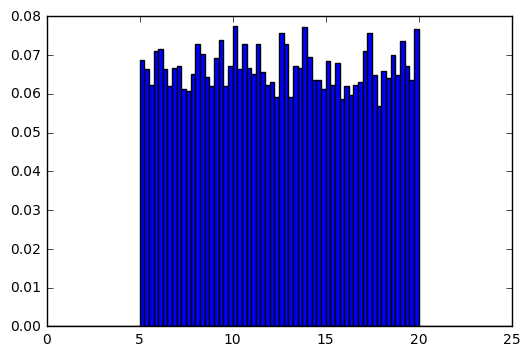

In [3]:
# this is a modified version of the warmup notebook.  Instead of reading the data in I'm generating using 
# random number generator (lower the sample size to make a rough disorderd distribution )

# generate a numpy vector w/uniform random data (small size)
randdata=np.random.uniform(low=5,high=20,size=10000)
# convert it into a pandas dataframe so the rest of our program will work 
mypop=pd.DataFrame(data=randdata, index=np.arange(randdata.size), columns=['data'])
# other things we can try np.random.XXXXXXXX

print (mypop.describe())
plt.hist(mypop.data,bins=100,normed=True,range=(0,25));

### This data is the so-called "uniform distribution" 

1) What is the probability of drawing the number 5000? 
2) How much of the range is covered by the standard deviation? 
3) The uniform distribution has a standard deviation of: $\sigma = \sqrt{\frac{(MAX-MIN)^2}{12}}$ , how close is our data to this value? 
4) The analytical answer to question 3 is: $\frac{1}{\sqrt{12}}$

In [5]:
print (1.0/(mypop.data.max()-mypop.data.min()))
print ()
print (mypop.data.std()/(mypop.data.max()-mypop.data.min()))
print ()
print (np.sqrt(np.power(mypop.data.max(),2)/12))
print (mypop.data.std())
print ()
print (1/np.sqrt(12))

# if you get an error output of this cell - it may be your Python is not compatible with: print ""

0.0666948830243

0.289386357256

5.77314606351
4.3389589146

0.288675134595


### A "real world" scenario

* You are conducting experiments that measure data. The data are a _sample_ that come from the _population_ represented in the array `mypop.data`
* Your goal is to estimate properties of the _population_ by taking _samples_ , you will start by estimating the population mean 
* You can control the sample `size`, i.e., how many points you collect in a given experiment 
* You can also control the number of experiments `samples`, i.e., how many experiments you conduct 

#### To do: 
* Change the size and # samples and study the output and look for any trends.  
    * Before you go crazy, I suggest being systematic, changing 1 variable at a time 
    * I also suggest you don't exceed a 1,0000,000 as the product of the `size x samples`
* Be exploratory - look for trends and try and understand what is happening 
    * If you want to see multiple `trials` just hit shift-enter and re-execute the same cell 



data    0.016278
dtype: float64
data    0.001303
dtype: float64


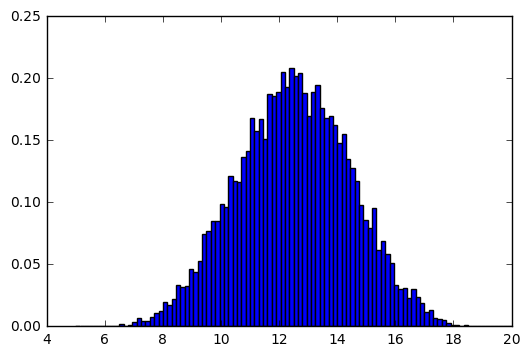

In [9]:
#you can control these

#how many data points you collect in each experiment
size=5
# how many experiments will you run 
samples=10000

#analysis of your data - you can ignore for now but what is happening is commented below

# initalize a vector of zeros that is of length of your # of samples
means=np.zeros(samples)

# iterate over the vector (currently all zeros), iterate in a way that 
# makes each element writeable (this is not standard but convenient for our purpose)
# the total number of iterations is the total number of samples (experiments) performed
for x in np.nditer(means, op_flags=['readwrite']):
    #take your data: this means you are randomly sampling the global population taking `size` points
    data2=np.random.choice(mypop.data,size=size)
    # update item x (this the ith experiment) with the sample mean
    x[...]=np.mean(data2)
    
#plot the histogram of your experiments 
plt.hist(means,range=[mypop.data.min(),mypop.data.max()],bins=100,normed=True)

#print the absolute differnece between the population mean (mu) and average of all your experimental data (xbar)
print (np.abs(mypop.mean()-means.mean()))
#print the relative diff (mu-xbar)/mu
print (np.abs((mypop.mean()-means.mean()))/mypop.mean())

### If time @ end of lecture or on your own 

* Lets revisit our warm-up in light of the _central limit theor

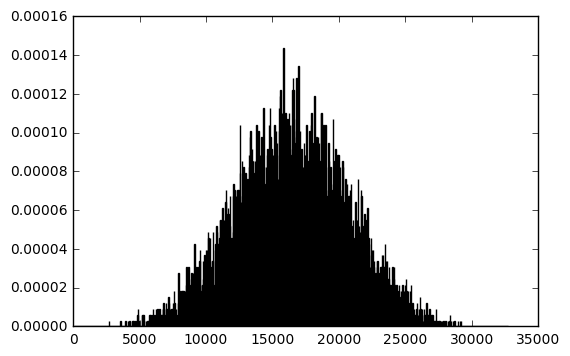

In [116]:
#Make the hist with a lot of bins
plt.hist(means,range=[mypop.data.min(),mypop.data.max()],bins=1000,normed=True);